In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress

In [18]:
csv_path1 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\parcial2\1- mental-illnesses-prevalence.csv"
df_prevalence_mi = pd.read_csv(csv_path1)
csv_path2 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\parcial2\2- burden-disease-from-each-mental-illness(1).csv"
df_burden_dis = pd.read_csv(csv_path2)
csv_path3 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\parcial2\3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv"
df_major_dep = pd.read_csv(csv_path3)
csv_path4 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\parcial2\4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv"
df_mental_ill = pd.read_csv(csv_path4)
csv_path5 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\parcial2\5- anxiety-disorders-treatment-gap.csv"
df_anx_treat = pd.read_csv(csv_path5)
csv_path6 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\parcial2\6- depressive-symptoms-across-us-population.csv"
df_dep_sympt = pd.read_csv(csv_path6)
csv_path7 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\modelos-computacionales-estela\parcial2\7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv"
df_no_countries = pd.read_csv(csv_path7)

In [205]:
# Crear una función llamada "df_ordered" que permita reordenar el df de mayor a menor (mayor depresión, mayor desorden alimenticio, etc)
def df_ordered(df, str):
    if str not in df.columns:
        raise ValueError('La columna no se encuentra en el df')
    df_sorted = df.sort_values(by= str, ascending = False)
    return df_sorted
# Crear una función llamada "plot_bar" que reciba un dataframe y un str y haga el plot de barras de ese dataframe considerando esa caracterísitca descrita por el string  
def plot_bar(df, str):
    df_sorted = df_ordered(df, str) 
    df_plot = df_sorted[['Entity', str]]
    plt.bar(df_plot['Entity'], df_plot[str], color = "teal" )
    plt.xlabel('Entidad')
    plt.ylabel(str)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [98]:
# Revisión de columnas
print('Columnas del data frame: ', df_mental_ill.columns)
df_mental_ill.columns = df_mental_ill.columns.str.strip()
print(df_mental_ill.head())

Columnas del data frame:  Index(['Entity', 'Code', 'Year', 'Major depression', 'Bipolar disorder',
       'Eating disorders', 'Dysthymia', 'Schizophrenia', 'Anxiety disorders'],
      dtype='object')
                 Entity Code  Year  Major depression  Bipolar disorder  \
0  Andean Latin America  NaN  2008               0.0               0.0   
1          Asia Pacific  NaN  2008              80.8               3.8   
2           Australasia  NaN  2008             100.0             100.0   
3             Caribbean  NaN  2008               9.1               0.0   
4          Central Asia  NaN  2008               0.0               0.0   

   Eating disorders  Dysthymia Schizophrenia  Anxiety disorders  
0               0.0        0.0             0                0.0  
1              23.1        1.0          71.6               93.1  
2              16.4      100.0          85.1              100.0  
3               0.0        0.0          28.3                0.0  
4               0.0      

In [112]:
# Países de mayor a menor prevalencia de depresión
df_reordenado = df_ordered(df_mental_ill, 'Major depression')
df_reordenado_dep = df_reordenado[['Entity', 'Major depression']]
print(df_reordenado_dep)

                         Entity  Major depression
2                   Australasia             100.0
12                North America             100.0
1                  Asia Pacific              80.8
20               Western Europe              73.6
6         Central Latin America              49.8
11     North Africa/Middle East              47.0
19      West Sub-Saharan Africa              46.6
21                        World              35.4
10               Eastern Europe              23.6
16       Southern Latin America              16.5
5                Central Europe              16.0
15               Southeast Asia              14.5
8                     East Asia              12.2
18       Tropical Latin America               9.7
3                     Caribbean               9.1
14                   South Asia               1.7
9       East Sub-Saharan Africa               1.3
17  Southern Sub-Saharan Africa               0.1
7    Central Sub-Saharan Africa               0.0


Text(0.5, 1.0, 'Valor de depresión según entidad')

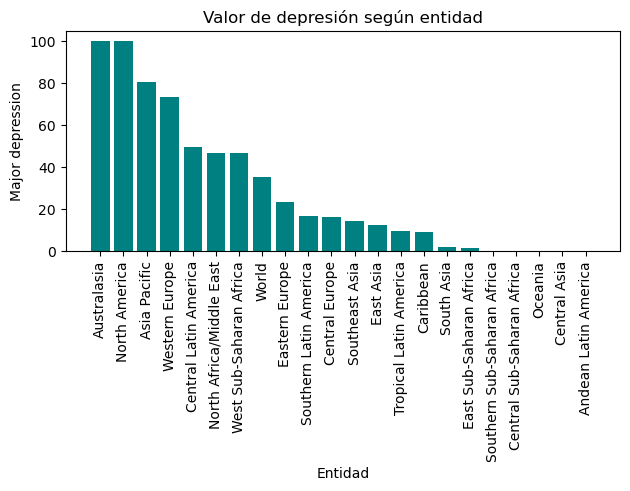

In [206]:
plot_bar(df_reordenado_dep, 'Major depression') 
plt.title('Valor de depresión según entidad')

In [119]:
# Países de mayor a menor prevalencia de depresión
df_reordenado = df_ordered(df_mental_ill, 'Eating disorders')
df_reordenado_ed = df_reordenado[['Entity', 'Eating disorders']]
print(df_reordenado_ed)

                         Entity  Eating disorders
12                North America              89.8
6         Central Latin America              71.0
20               Western Europe              57.3
1                  Asia Pacific              23.1
18       Tropical Latin America              21.1
5                Central Europe              18.8
2                   Australasia              16.4
21                        World              15.2
8                     East Asia               7.9
9       East Sub-Saharan Africa               0.1
15               Southeast Asia               0.0
19      West Sub-Saharan Africa               0.0
17  Southern Sub-Saharan Africa               0.0
16       Southern Latin America               0.0
0          Andean Latin America               0.0
14                   South Asia               0.0
13                      Oceania               0.0
10               Eastern Europe               0.0
7    Central Sub-Saharan Africa               0.0


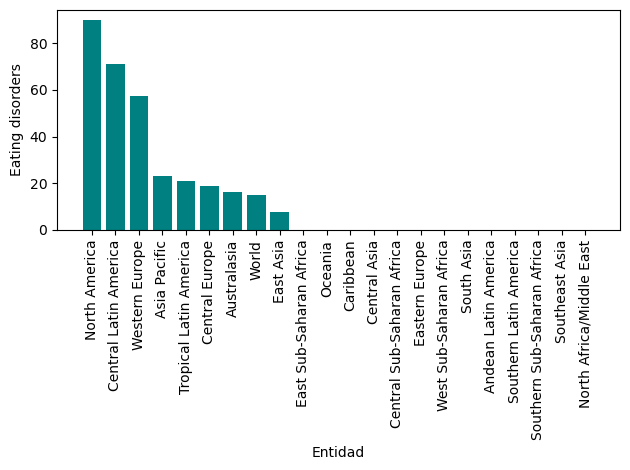

In [207]:
# Gráfica de barras mostrando el valor de desorden alimenticio y entidad (país)
plot_bar(df_reordenado_ed, 'Eating disorders')

In [216]:
df_mental_ill['Schizophrenia'].dtype # revisión de data frame, columna: Schizophrenia
df_mental_ill['Schizophrenia'] = pd.to_numeric(df_mental_ill['Schizophrenia']) # conversión a numéricos

In [217]:
# Países con mayor esquizofrenia
df_reordenado = df_ordered(df_mental_ill, 'Schizophrenia')
df_reordenado_sch = df_reordenado[['Entity', 'Schizophrenia']]
print(df_reordenado_sch)

                         Entity  Schizophrenia
12                North America           89.8
2                   Australasia           85.1
1                  Asia Pacific           71.6
3                     Caribbean           28.3
8                     East Asia           15.6
21                        World           14.2
20               Western Europe           12.6
9       East Sub-Saharan Africa            6.4
14                   South Asia            6.3
10               Eastern Europe            1.3
6         Central Latin America            0.7
13                      Oceania            0.4
15               Southeast Asia            0.4
7    Central Sub-Saharan Africa            0.0
11     North Africa/Middle East            0.0
5                Central Europe            0.0
16       Southern Latin America            0.0
18       Tropical Latin America            0.0
19      West Sub-Saharan Africa            0.0
4                  Central Asia            0.0
0          An

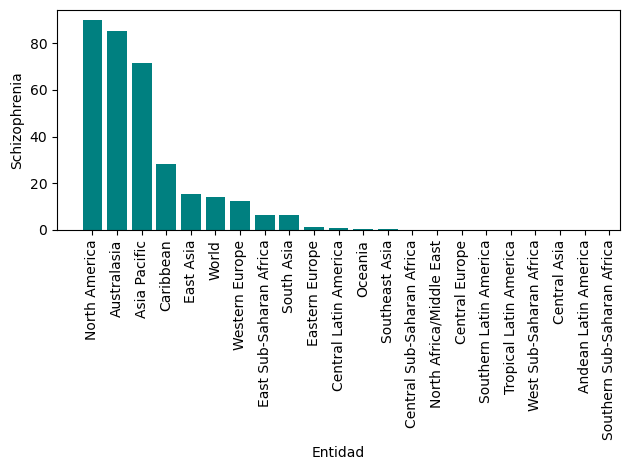

In [215]:
# Gráfica de barras mostrando el valor de esquizofrenia y entidad
plot_bar(df_reordenado_sch, 'Schizophrenia')

In [150]:
# Crea un data frame por los valores por país de ["Entity Code", "Year", "Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
df_prevalence_mi.rename(columns={
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety disorders',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar disorders',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating disorders'
}, inplace=True)
df_prevalence_mi.columns # data frame renombrado 
columns_filt = ["Entity", "Code", "Year", "Schizophrenia", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
df_filtered = df_prevalence_mi[columns_filt]
df_filtered # data frame filtrado

,Entity,Code,Year,Schizophrenia,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [153]:
# Mostrar los estadísticos del data frame anterior
df_filtered[['Schizophrenia','Depressive disorders','Anxiety disorders','Bipolar disorders', 'Eating disorders']].describe()

,Schizophrenia,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,0.266604,3.767036,4.101840,0.636968,0.195664
std,0.039383,0.925286,1.050543,0.233391,0.138380
min,0.188416,1.522333,1.879996,0.181667,0.044780
25%,0.242267,3.080036,3.425846,0.520872,0.096416
50%,0.273477,3.636772,3.939547,0.579331,0.144150
75%,0.286575,4.366252,4.564164,0.844406,0.251167
max,0.462045,7.645899,8.624634,1.506730,1.031688


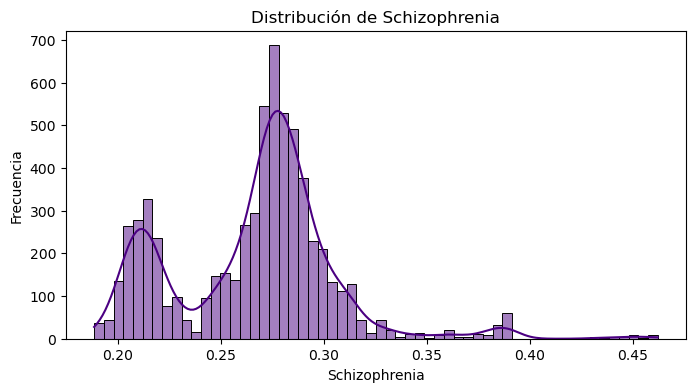

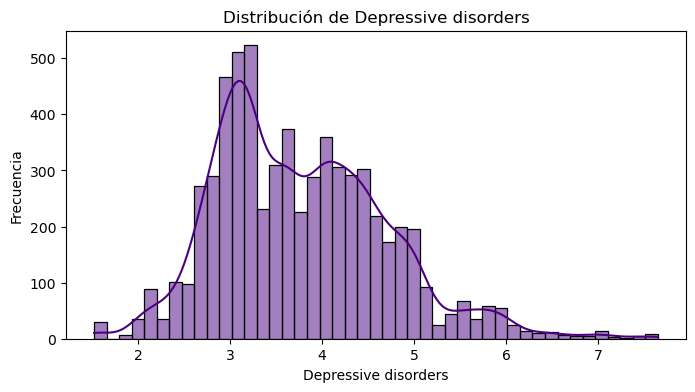

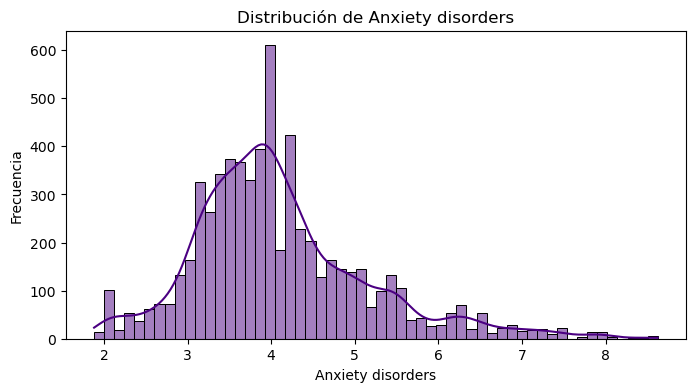

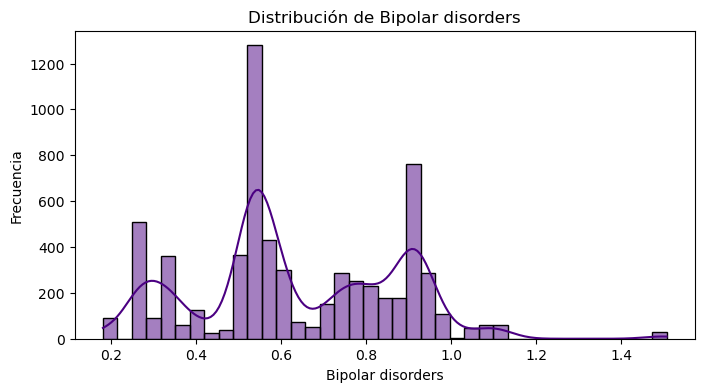

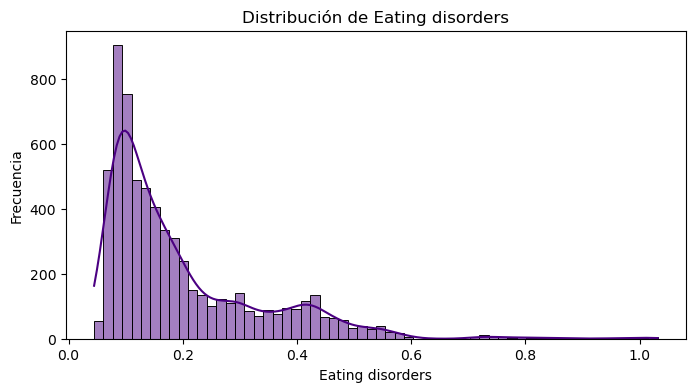

In [208]:
# Mostrar la distribución de cada feature del data frame anterior
for column in ['Schizophrenia', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_prevalence_mi[column], kde=True, color='indigo')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [168]:
# Mostrar en un mapa de color la correlación entre las features: ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
cols_high = ['Schizophrenia', 'Depressive disorders', 'Anxiety disorders','Bipolar disorders', 'Eating disorders']
df_colormap = df_filtered[cols_high]
corr = df_colormap.corr()
corr.style.background_gradient(cmap='Blues')

,Schizophrenia,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
Schizophrenia,1.000000,-0.474994,0.304149,0.121542,0.500656
Depressive disorders,-0.474994,1.000000,0.114429,0.153039,-0.052067
Anxiety disorders,0.304149,0.114429,1.000000,0.576230,0.594511
Bipolar disorders,0.121542,0.153039,0.576230,1.000000,0.677927
Eating disorders,0.500656,-0.052067,0.594511,0.677927,1.000000


In [171]:
# Dataset cancer_reg
csv_path8 = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\Neurociencias-2025-1\datasets\cancer_regression\cancer_reg.csv"
df_cancer_reg = pd.read_csv(csv_path8)
df_cancer_reg

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [175]:
# Determinar la correlación entre las features  ['target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage']
df_cancer_reg_filt = df_cancer_reg[[ 'target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage']]
df_cancer_reg_filt
corr_cancer_reg = df_cancer_reg_filt.corr()
corr_cancer_reg

,target_deathrate,avganncount,avgdeathsperyear,incidencerate,medincome,povertypercent,pctprivatecoverage,pctpubliccoverage
target_deathrate,1.000000,-0.143532,-0.090715,0.449432,-0.428615,0.429389,-0.386066,0.404572
avganncount,-0.143532,1.000000,0.939408,0.073553,0.269145,-0.135694,0.132244,-0.173548
avgdeathsperyear,-0.090715,0.939408,1.000000,0.062690,0.223207,-0.066918,0.056183,-0.131687
incidencerate,0.449432,0.073553,0.062690,1.000000,-0.001036,0.009046,0.105174,0.046109
medincome,-0.428615,0.269145,0.223207,-0.001036,1.000000,-0.788965,0.724175,-0.754822
povertypercent,0.429389,-0.135694,-0.066918,0.009046,-0.788965,1.000000,-0.822534,0.651162
pctprivatecoverage,-0.386066,0.132244,0.056183,0.105174,0.724175,-0.822534,1.000000,-0.720012
pctpubliccoverage,0.404572,-0.173548,-0.131687,0.046109,-0.754822,0.651162,-0.720012,1.000000


In [176]:
# Determinar la correlación: mapa de color
corr_cancer_reg.style.background_gradient(cmap='Blues')

,target_deathrate,avganncount,avgdeathsperyear,incidencerate,medincome,povertypercent,pctprivatecoverage,pctpubliccoverage
target_deathrate,1.000000,-0.143532,-0.090715,0.449432,-0.428615,0.429389,-0.386066,0.404572
avganncount,-0.143532,1.000000,0.939408,0.073553,0.269145,-0.135694,0.132244,-0.173548
avgdeathsperyear,-0.090715,0.939408,1.000000,0.062690,0.223207,-0.066918,0.056183,-0.131687
incidencerate,0.449432,0.073553,0.062690,1.000000,-0.001036,0.009046,0.105174,0.046109
medincome,-0.428615,0.269145,0.223207,-0.001036,1.000000,-0.788965,0.724175,-0.754822
povertypercent,0.429389,-0.135694,-0.066918,0.009046,-0.788965,1.000000,-0.822534,0.651162
pctprivatecoverage,-0.386066,0.132244,0.056183,0.105174,0.724175,-0.822534,1.000000,-0.720012
pctpubliccoverage,0.404572,-0.173548,-0.131687,0.046109,-0.754822,0.651162,-0.720012,1.000000


In [ ]:
# nota: altas correlaciones: avganncount, acgdeathsperyear

AttributeError: 'function' object has no attribute 'show'

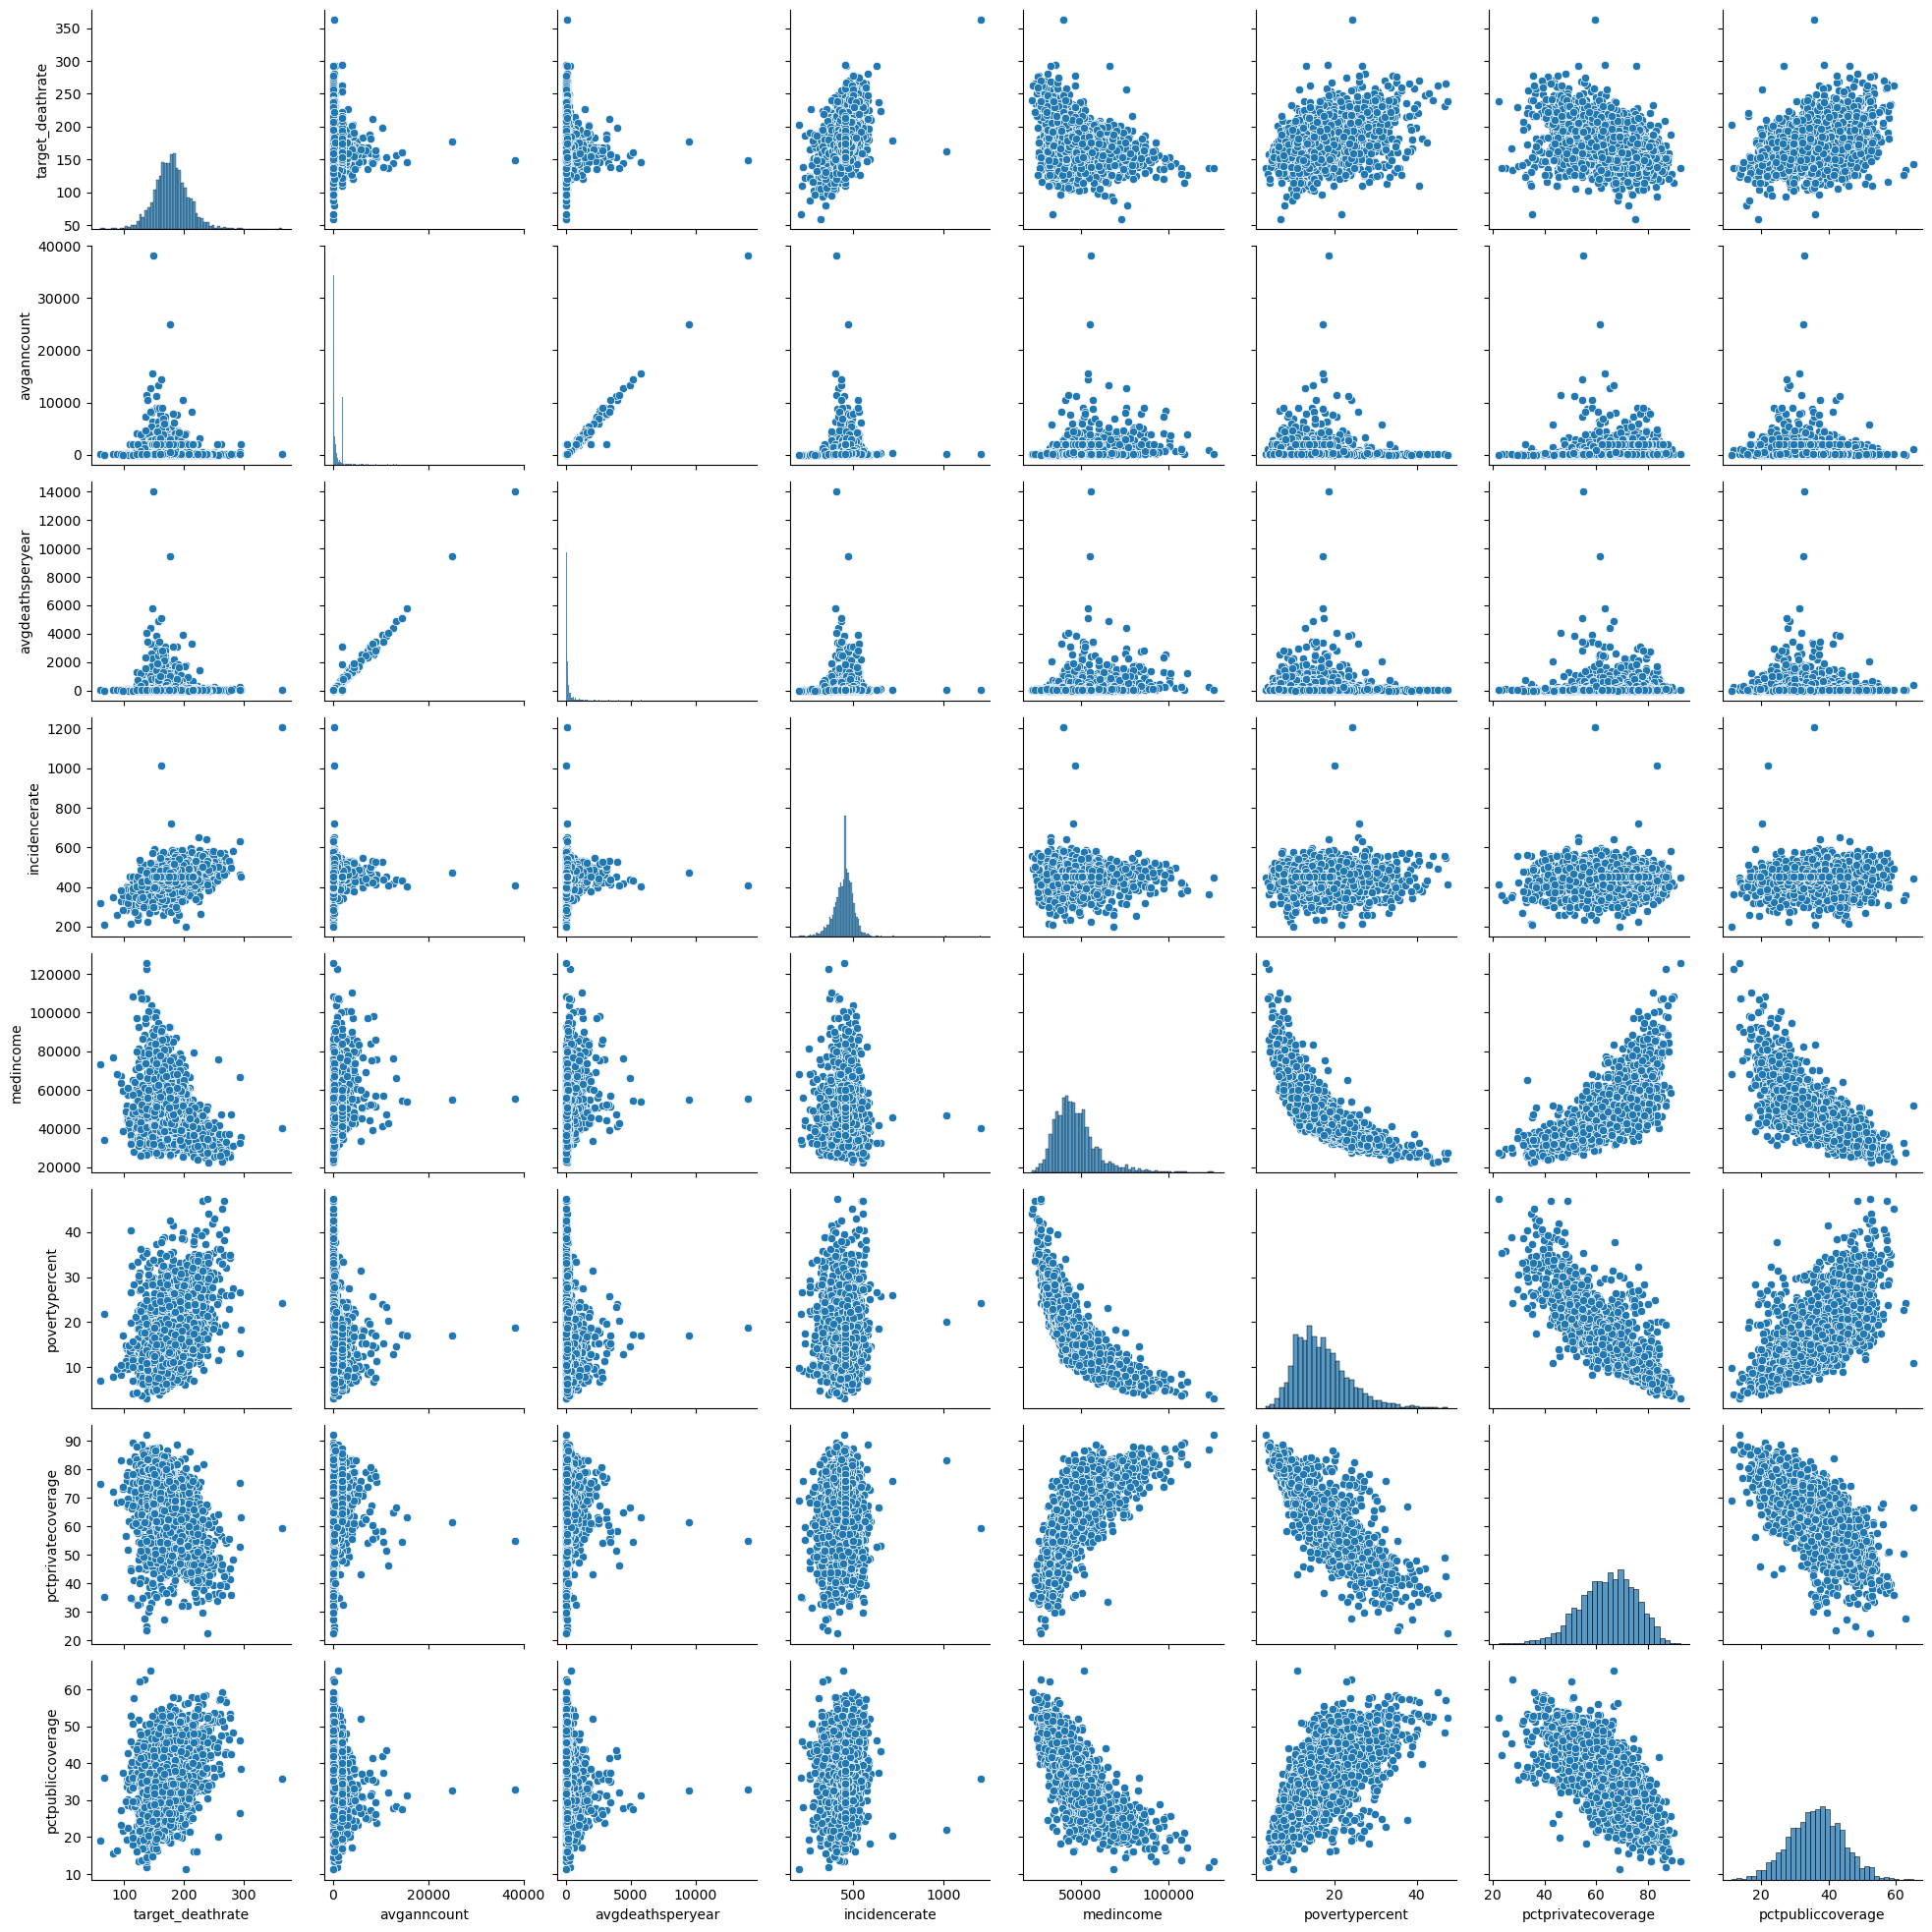

In [182]:
# Wncontrar los valores de la recta para aquellos que tengan dependencia lineal
# Hint: spicy
sns.pairplot(df_cancer_reg_filt, markers='o')
sns.pairplot.show()

In [187]:
x= df_cancer_reg_filt["avganncount"]
y= df_cancer_reg_filt["avgdeathsperyear"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Pendiente (slope): {slope}")
print(f"Ordenada al origen (intercept): {intercept}")
print(f"Coeficiente de correlación (r_value): {r_value}")
print(f"P value (p_value): {p_value}")
print(f"Error estándar (std_err): {std_err}")

Pendiente (slope): 0.33437045310825686
Ordenada al origen (intercept): -16.775825554463864
Coeficiente de correlación (r_value): 0.9394077833002427
P value (p_value): 0.0
Error estándar (std_err): 0.0022111748125440804


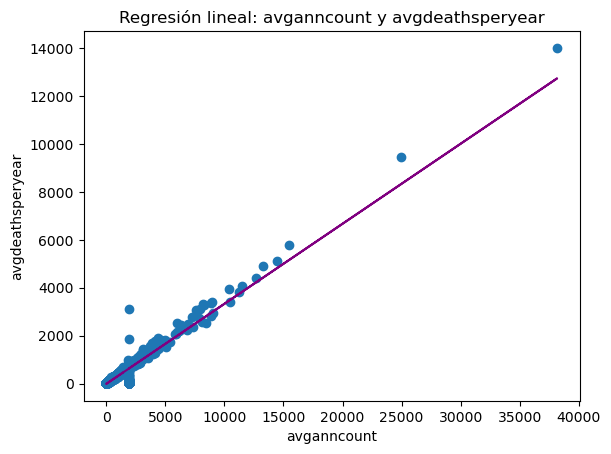

In [218]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, intercept + slope * x, color='purple')
plt.xlabel('avganncount')
plt.ylabel('avgdeathsperyear')
plt.title('Regresión lineal: avganncount y avgdeathsperyear')
plt.show()

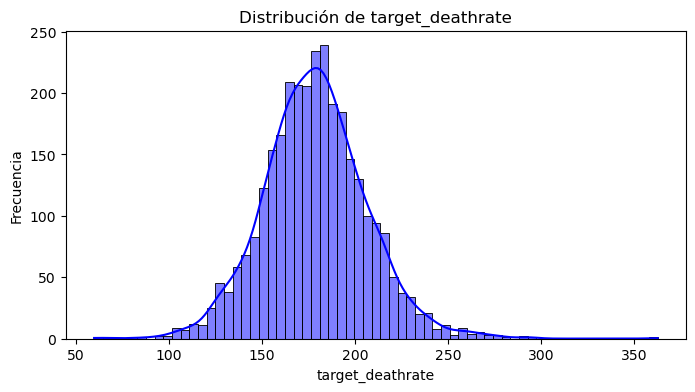

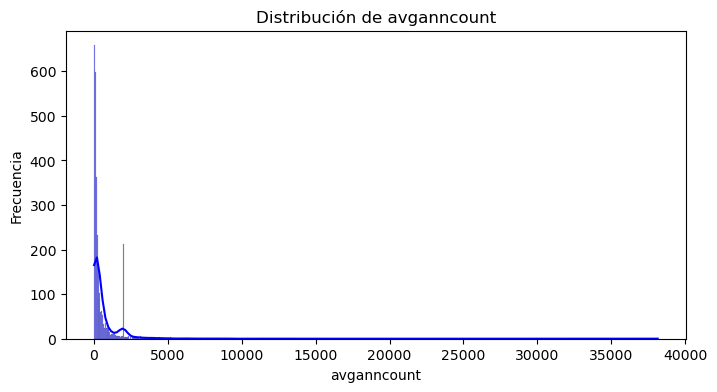

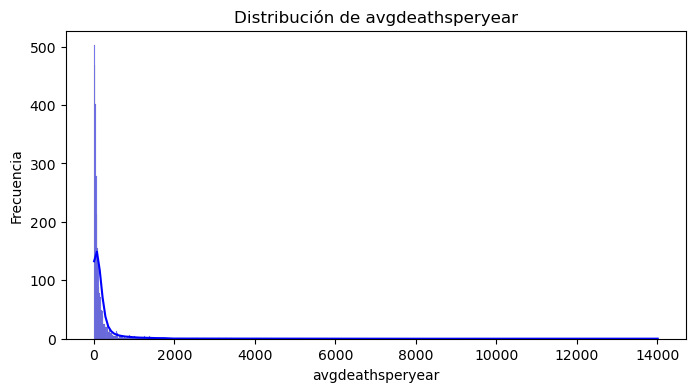

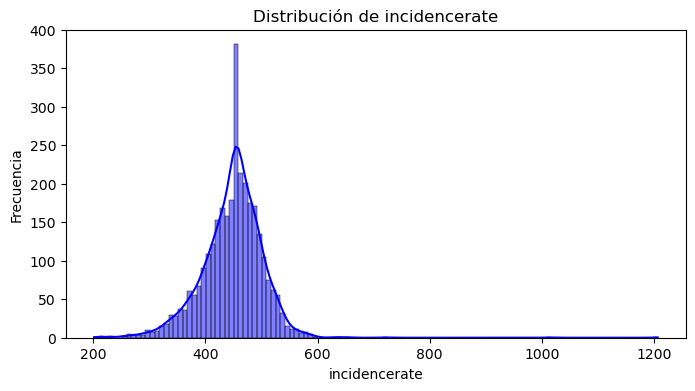

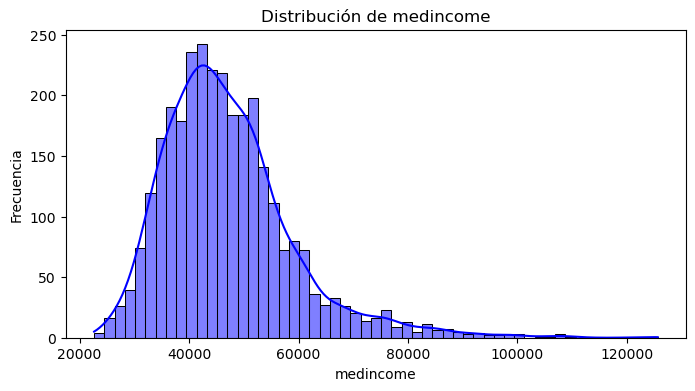

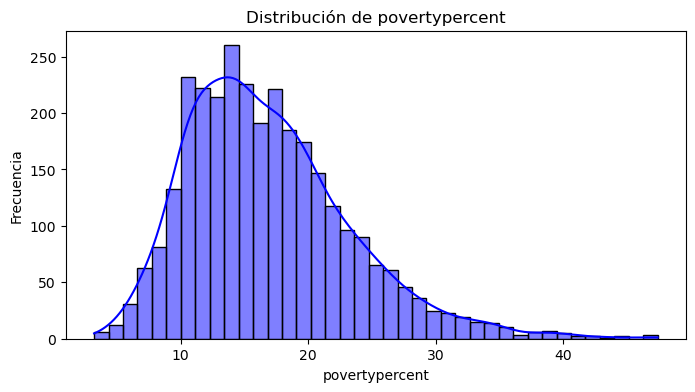

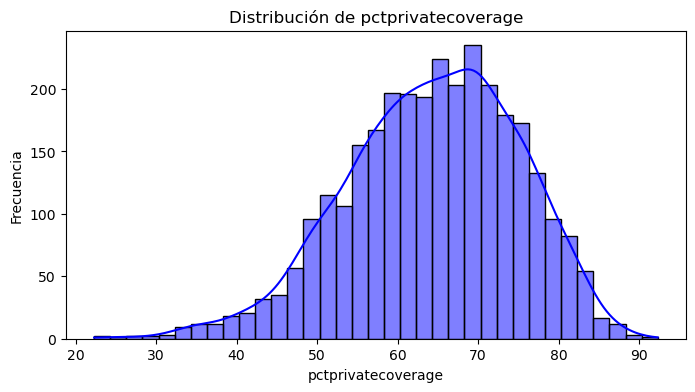

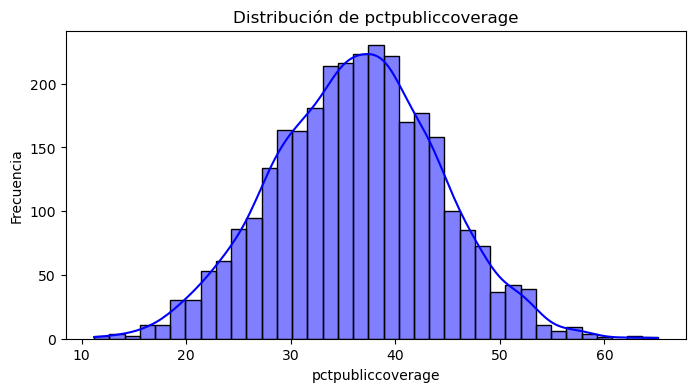

In [178]:
# Mostrar la distribución de cada feature del dataframe anterior
for column in ['target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cancer_reg[column], kde=True, color='blue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()